In [ ]:
import os
import sys
import ctypes
import math
import numpy
import numpy as np
import h5py
import adios2

In [2]:
import h5py

# Access specific elements in the concatenated array
def access_array_element(file, timestep, x, y, z):
    dataset = file['data']
    element = dataset[timestep, x, y, z]
    return element

# Access a subset of the concatenated array
def access_array_subset(file, timestep_start, timestep_end, x_start, x_end, y_start, y_end, z_start, z_end):
    dataset = file['data']
    subset = dataset[timestep_start:timestep_end, x_start:x_end, y_start:y_end, z_start:z_end]
    return subset



In [4]:
output_file = '/scratch2/aoyagir/new_research/step1_500_test.h5'


x_start = 0
y_start = 0
z_start = 0

x_end = 1024
y_end = 1024
z_end = 1024

t_start = 0
t_end = 1

In [5]:
with h5py.File(output_file, 'r') as file:

    # Access a subset of the concatenated array
    subset = access_array_subset(file, t_start, t_end, x_start, x_end, y_start, y_end, z_start, z_end)  # Access a subset of the array
    print(str(subset.nbytes/(1024 ** 3)) + "Gb")

4.0Gb


In [6]:
print(type(subset))
print(subset.shape)

<class 'numpy.ndarray'>
(1, 1024, 1024, 1024, 1)


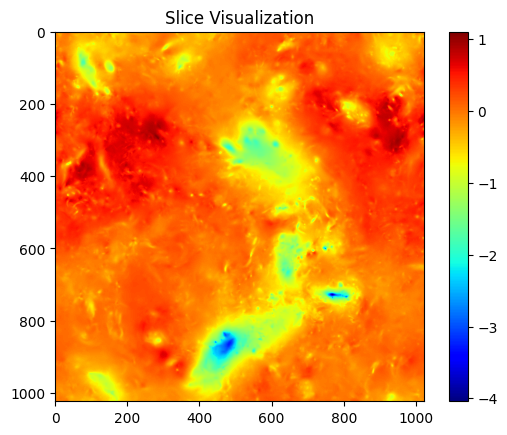

In [36]:
import matplotlib.pyplot as plt


# Fix the first axis index and the axis index you want to visualize
fixed_first_axis_index = 1
fixed_axis_index = 100

reshaped_array = np.squeeze(subset)

print(reshaped_array.shape)
# Extract the slice from the array based on the fixed indices
data = reshaped_array[1, :,:]

# Visualize the slice using matplotlib
plt.imshow(data, cmap='jet')
plt.colorbar()
plt.title("Slice Visualization")
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Fix the first axis index and define the range of fixed_axis_index values
fixed_first_axis_index = 19
fixed_axis_indices = range(1024)  # Change this range according to your needs

# Create a figure and axes for the animation
fig, ax = plt.subplots()

# Function to update the plot for each frame
def update(frame):
    # Clear the previous plot
    ax.cla()

    # Extract the slice from the array based on the fixed indices
    slice_data = subset[fixed_first_axis_index, :, :, frame, 0]

    # Plot the slice
    ax.imshow(slice_data, cmap='jet')
    ax.set_title("Slice Visualization - Fixed Z Index: {}".format(frame))

# Create the animation
animation = FuncAnimation(fig, update, frames=fixed_axis_indices, interval=50)

# save the animation
animation.save("anime5_t=19.gif",writer="pillow",dpi=600)
plt.close()